From sklearn.datasets load digits dataset and do following:

1. Classify digits (0 to 9) using KNN classifier. You can use different values for k neighbors and need to figure out a value of K that gives you a maximum score. You can manually try different values of K or use gridsearchcv.
2. Plot confusion matrix
3. Plot classification report

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
digits = load_digits()
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
list(digits.target_names)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
df = pd.DataFrame(digits.data)
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [6]:
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [7]:
X = df.drop('target', axis='columns')
y = df.target

In [32]:
clf = GridSearchCV(KNeighborsClassifier(), {
    'n_neighbors': [3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [20, 30, 40, 50, 60],
    'p': [1, 2]
}, cv=5, return_train_score=False)

clf.fit(digits.data, digits.target)
clf.cv_results_

{'mean_fit_time': array([0.00140209, 0.0010057 , 0.00120144, 0.00080562, 0.00120268,
        0.00100045, 0.00079975, 0.00101123, 0.00141339, 0.00080013,
        0.00100398, 0.0008008 , 0.00080147, 0.00079274, 0.00119963,
        0.00080066, 0.00100493, 0.0012002 , 0.00099864, 0.0010004 ,
        0.0008039 , 0.00100613, 0.00060134, 0.00120635, 0.00080256,
        0.00100031, 0.00120187, 0.00100803, 0.00100422, 0.00159941,
        0.00100422, 0.00098929, 0.0012032 , 0.0020021 , 0.00140319,
        0.00200133, 0.00120063, 0.0013957 , 0.00160022, 0.00120192,
        0.00121102, 0.00160074, 0.00079837, 0.00120206, 0.00160255,
        0.00120754, 0.0020009 , 0.00140142, 0.00199752, 0.00160141,
        0.00059986, 0.00119381, 0.00100102, 0.00159836, 0.00139995,
        0.0014009 , 0.00180426, 0.00139933, 0.0011879 , 0.00160275,
        0.00139885, 0.00099444, 0.00140014, 0.00159917, 0.0012043 ,
        0.00099969, 0.00120125, 0.00119863, 0.00060053, 0.00161071,
        0.00179663, 0.00099988,

In [33]:
df_result = pd.DataFrame(clf.cv_results_)
df_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001402,0.000492,0.035399,0.009046,auto,20,3,1,uniform,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neig...",0.955556,0.933333,0.958217,0.983287,0.952646,0.956608,0.015955,123
1,0.001006,0.000010,0.018795,0.001462,auto,20,3,1,distance,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neig...",0.955556,0.936111,0.961003,0.983287,0.952646,0.957721,0.015243,103
2,0.001201,0.000398,0.005200,0.000978,auto,20,3,2,uniform,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neig...",0.955556,0.958333,0.966574,0.986072,0.966574,0.966622,0.010672,1
3,0.000806,0.000403,0.005595,0.001194,auto,20,3,2,distance,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neig...",0.955556,0.958333,0.969359,0.986072,0.961003,0.966065,0.011018,16
4,0.001203,0.000396,0.026199,0.003050,auto,20,5,1,uniform,"{'algorithm': 'auto', 'leaf_size': 20, 'n_neig...",0.944444,0.938889,0.961003,0.972145,0.949861,0.953268,0.011936,211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,0.001021,0.000035,0.007980,0.001107,brute,60,10,2,distance,"{'algorithm': 'brute', 'leaf_size': 60, 'n_nei...",0.936111,0.952778,0.974930,0.977716,0.952646,0.958836,0.015536,81
316,0.000792,0.000396,0.032003,0.002277,brute,60,20,1,uniform,"{'algorithm': 'brute', 'leaf_size': 60, 'n_nei...",0.919444,0.925000,0.952646,0.961003,0.938719,0.939362,0.015800,311
317,0.001018,0.000034,0.020580,0.001378,brute,60,20,1,distance,"{'algorithm': 'brute', 'leaf_size': 60, 'n_nei...",0.922222,0.938889,0.963788,0.966574,0.944290,0.947153,0.016443,281
318,0.000613,0.000501,0.007389,0.000504,brute,60,20,2,uniform,"{'algorithm': 'brute', 'leaf_size': 60, 'n_nei...",0.925000,0.950000,0.966574,0.961003,0.944290,0.949373,0.014501,263


In [34]:
df_result[['param_n_neighbors', 'param_p', 'param_weights', 'param_algorithm', 'mean_test_score']]

,param_n_neighbors,param_p,param_weights,param_algorithm,mean_test_score
0,3,1,uniform,auto,0.956608
1,3,1,distance,auto,0.957721
2,3,2,uniform,auto,0.966622
3,3,2,distance,auto,0.966065
4,5,1,uniform,auto,0.953268
...,...,...,...,...,...
315,10,2,distance,brute,0.958836
316,20,1,uniform,brute,0.939362
317,20,1,distance,brute,0.947153
318,20,2,uniform,brute,0.949373


In [35]:
clf.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [36]:
clf.best_score_

0.966621788919839

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [14]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
model.score(X_test, y_test)

0.9888888888888889

Text(0.5, 1.0, 'Confusion Matrix')

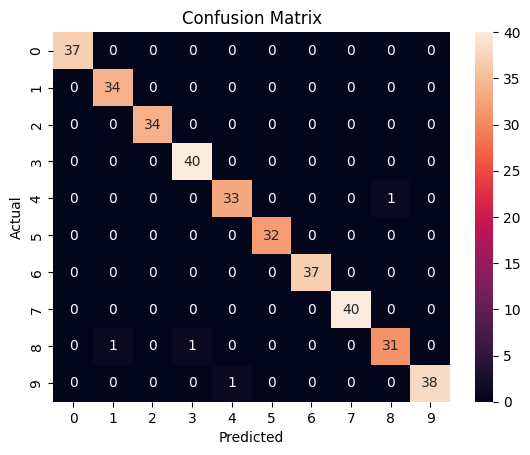

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred = model.predict(X_test)
cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot=True, fmt="")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       1.00      1.00      1.00        34
           3       0.98      1.00      0.99        40
           4       0.97      0.97      0.97        34
           5       1.00      1.00      1.00        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.97      0.94      0.95        33
           9       1.00      0.97      0.99        39

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360

